In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("../Speed Dating Data.csv")

In [3]:
df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


## Age Distribution 

In [4]:
df[["age"]].describe()

,age
count,8283.000000
mean,26.358928
std,3.566763
min,18.000000
25%,24.000000
50%,26.000000
75%,28.000000
max,55.000000


(array([ 376., 3249., 3263.,  909.,  418.,   42.,   20.,    0.,    0.,
           6.]),
 array([18. , 21.7, 25.4, 29.1, 32.8, 36.5, 40.2, 43.9, 47.6, 51.3, 55. ]),
 <a list of 10 Patch objects>)

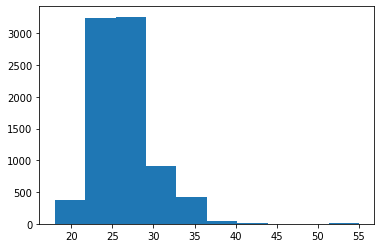

In [5]:
plt.hist(df["age"])

## Class imbalance

In [6]:
match_count = pd.crosstab(index=df['match'],columns="count")
match_count

col_0,count
match,
0,6998
1,1380


In [7]:
print(f"Match Yes {match_count.iloc[0] / df.shape[0]}")
print(f"Match Yes {match_count.iloc[1] / df.shape[0]}")

Match Yes col_0
count    0.835283
Name: 0, dtype: float64
Match Yes col_0
count    0.164717
Name: 1, dtype: float64


## Unrequited Response

In [8]:
unrequited = len(df[(df['dec_o']==0) & (df['dec']==1)]) + len(df[(df['dec_o']==1) & (df['dec']==0)])

print(f"Percent of unrequited responses { (unrequited / len(df)) * 100 }")

Percent of unrequited responses 51.00262592504178


## Which gender decides more against a date?

In [9]:
women_dec_no = len(df[(df['dec']==0) & (df['gender']==0)])
women_all = len(df[(df['gender']==0)])

men_dec_no = len(df[(df['dec']==0) & (df['gender']==1)])
men_all = len(df[(df['gender']==1)])

print(f"Women rejection rate: {(women_dec_no/women_all)*100}")
print(f"Men rejection rate: {(men_dec_no/men_all)*100}")

Women rejection rate: 63.456022944550675
Men rejection rate: 52.57510729613733


In [10]:
women_dec_no = len(df[(df['dec']==0) & (df['gender']==0) & (df['dec_o']==1)])
unrequited = len(df[(df['dec']==0) & (df['dec_o']==1)])

men_dec_no = len(df[(df['dec']==0) & (df['gender']==1) & (df['dec_o']==1)])

print(f"Women rejection rate: {(women_dec_no/unrequited)*100}")
print(f"Men rejection rate: {(men_dec_no/unrequited)*100}")

Women rejection rate: 60.702576112412174
Men rejection rate: 39.297423887587826


## Rejection rate towards attributes

In [11]:
attributes = df[['attr','sinc','intel','fun','like','int_corr', 'match',"dec", "gender", 
                 "amb", "samerace", "exphappy", "prob"]]

In [12]:
attributes_clean = attributes.dropna()

In [13]:
attributes_clean.describe()

,attr,sinc,intel,fun,like,int_corr,match,dec,gender,amb,samerace,exphappy,prob
count,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000,7308.000000
mean,6.177874,7.160441,7.354953,6.393336,6.121880,0.196182,0.169951,0.428161,0.504242,6.767241,0.396004,5.526409,5.231390
std,1.945595,1.743730,1.551310,1.946531,1.833296,0.304534,0.375615,0.494846,0.500016,1.790333,0.489099,1.743192,2.128123
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.830000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.000000,6.000000,6.000000,5.000000,5.000000,-0.020000,0.000000,0.000000,0.000000,6.000000,0.000000,5.000000,4.000000
50%,6.000000,7.000000,7.000000,7.000000,6.000000,0.210000,0.000000,0.000000,1.000000,7.000000,0.000000,6.000000,5.000000
75%,8.000000,8.000000,8.000000,8.000000,7.000000,0.430000,0.000000,1.000000,1.000000,8.000000,1.000000,7.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,0.910000,1.000000,1.000000,1.000000,10.000000,1.000000,10.000000,10.000000


In [14]:
attributes_clean['gender'] = np.where(attributes_clean['gender'] == 0, "Women", 
                                      attributes_clean['gender'])

attributes_clean['gender'] = np.where(attributes_clean['gender'] == "1", "Men", 
                                      attributes_clean['gender'])

<ipython-input-14-798690d5f73d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attributes_clean['gender'] = np.where(attributes_clean['gender'] == 0, "Women",
<ipython-input-14-798690d5f73d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attributes_clean['gender'] = np.where(attributes_clean['gender'] == "1", "Men",


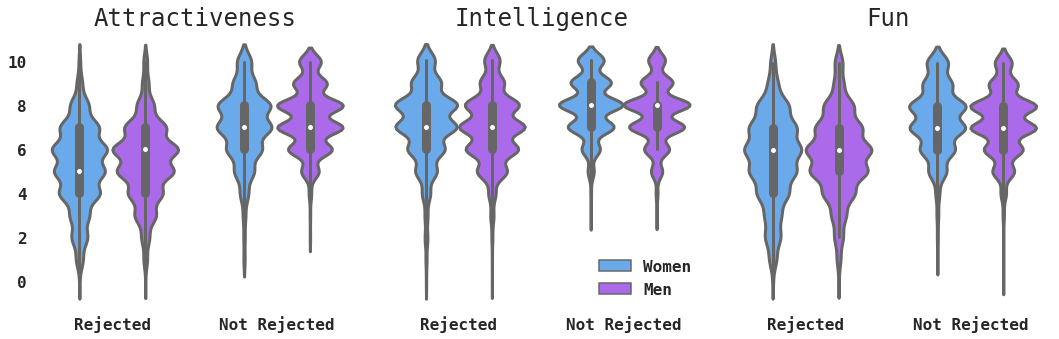

In [22]:
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 16}

plt.style.use("seaborn-white")
plt.rc('font', **
       font)
plt.rc('axes', titlesize=24)
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[1].yaxis.set_visible(False)
axes[2].yaxis.set_visible(False)

g1 = sns.violinplot(x='dec', y='attr', data=attributes_clean, palette='cool', 
               linewidth=3, hue=attributes_clean['gender'], ax=axes[0], inner="box")

g2 = sns.violinplot(x='dec', y='intel', data=attributes_clean, palette='cool', 
               linewidth=3, hue=attributes_clean['gender'], ax=axes[1],  inner="box")

g3 = sns.violinplot(x='dec', y='fun', data=attributes_clean, palette='cool', 
               linewidth=3, hue=attributes_clean['gender'], ax=axes[2], inner="box")

axes[0].set_ylabel("")
axes[0].grid(False)

axes[0].set_title("Attractiveness")
axes[1].set_title("Intelligence")
axes[2].set_title("Fun")

for pos in ['right', 'top', 'bottom', 'left']:
    axes[0].spines[pos].set_visible(False)
    axes[1].spines[pos].set_visible(False)
    axes[2].spines[pos].set_visible(False)
    
axes[0].set_xticklabels(["Rejected", "Not Rejected"])
axes[1].set_xticklabels(["Rejected", "Not Rejected"])
axes[2].set_xticklabels(["Rejected", "Not Rejected"])

axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")

axes[0].get_legend().remove()
axes[2].get_legend().remove()
g2.legend(title="")

plt.tight_layout()
plt.savefig("rejection.png")
plt.show()


## Interest Overlap

In [16]:
interests = df.iloc[:, 50:67]
interests["gender"] = df["gender"]

In [57]:
interests_clean = interests.dropna()

In [58]:
interests_clean.describe()

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,gender
count,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000
mean,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.881191,5.745993,7.678515,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,0.502952
std,2.619024,2.801874,2.418858,1.754868,2.052232,2.263407,2.570207,2.620507,2.502218,2.006565,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,0.500021
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,0.000000
50%,7.000000,4.000000,6.000000,8.000000,7.000000,7.000000,6.000000,3.000000,6.000000,8.000000,6.000000,7.000000,8.000000,7.000000,8.000000,6.000000,4.000000,1.000000
75%,9.000000,7.000000,8.000000,9.000000,9.000000,8.000000,8.000000,6.000000,8.000000,9.000000,7.000000,9.000000,9.000000,8.000000,9.000000,8.000000,7.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,14.000000,10.000000,13.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [59]:
interests_clean = interests_clean[(interests_clean["gaming"] <= 10)]
interests_clean = interests_clean[(interests_clean["reading"] <= 10)]

In [60]:
interests_clean.describe()

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,gender
count,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000,8170.000000
mean,6.445655,4.587638,6.262546,7.772583,6.990208,6.720196,5.727417,3.776622,5.737699,7.656304,5.272338,6.793880,7.916524,6.811383,7.845288,5.619951,4.350184,0.500857
std,2.618249,2.798793,2.417037,1.756211,2.055456,2.260444,2.576292,2.438956,2.495016,1.951327,2.525692,2.225859,1.704339,2.155662,1.787542,2.594450,2.707586,0.500030
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,5.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,0.000000
50%,7.000000,4.000000,7.000000,8.000000,7.000000,7.000000,6.000000,3.000000,6.000000,8.000000,6.000000,7.000000,8.000000,7.000000,8.000000,6.000000,4.000000,1.000000
75%,9.000000,7.000000,8.000000,9.000000,9.000000,8.000000,8.000000,6.000000,8.000000,9.000000,7.000000,9.000000,9.000000,8.000000,9.000000,8.000000,7.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [61]:
int_clean_women = interests_clean[interests_clean["gender"] == 0]
int_clean_men = interests_clean[interests_clean["gender"] == 1]

In [62]:
int_clean_women.describe()

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,gender
count,4078.000000,4078.000000,4078.00000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.00000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.0
mean,5.795488,4.159392,6.45488,8.146886,7.450711,7.249387,5.934772,3.216773,5.877391,7.882540,5.732957,7.51177,8.209171,7.096861,7.979647,6.512261,5.011770,0.0
std,2.656504,2.609411,2.45015,1.590151,1.887542,2.043156,2.566202,2.298669,2.442103,1.929385,2.494546,2.09388,1.553129,2.011174,1.675057,2.365275,2.683237,0.0
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.00000,2.000000,1.000000,1.000000,1.000000,1.000000,0.0
25%,4.000000,2.000000,5.00000,7.000000,7.000000,6.000000,4.000000,1.000000,4.000000,7.000000,4.000000,7.00000,7.000000,6.000000,7.000000,5.000000,3.000000,0.0
50%,6.000000,4.000000,7.00000,8.000000,8.000000,8.000000,6.000000,3.000000,6.000000,8.000000,6.000000,8.00000,8.000000,7.000000,8.000000,7.000000,5.000000,0.0
75%,8.000000,6.000000,8.00000,9.000000,9.000000,9.000000,8.000000,5.000000,8.000000,9.000000,8.000000,9.00000,9.000000,9.000000,9.000000,9.000000,7.000000,0.0
max,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,0.0


In [63]:
int_clean_men.describe()

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,gender
count,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.000000,4092.0
mean,7.093597,5.014418,6.070870,7.399560,6.531281,6.192815,5.520772,4.334555,5.598485,7.430841,4.813294,6.078446,7.624878,6.526882,7.711388,4.730694,3.690860,1.0
std,2.411329,2.913910,2.368386,1.833028,2.112747,2.342098,2.570028,2.447143,2.539317,1.947203,2.472699,2.120878,1.796081,2.255174,1.883697,2.506175,2.567587,0.0
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0
25%,6.000000,2.000000,4.000000,6.000000,5.000000,4.000000,3.000000,2.000000,4.000000,6.000000,3.000000,5.000000,7.000000,5.000000,7.000000,2.000000,1.000000,1.0
50%,7.000000,5.000000,6.000000,8.000000,7.000000,7.000000,6.000000,4.000000,6.000000,8.000000,5.000000,6.000000,8.000000,7.000000,8.000000,5.000000,3.000000,1.0
75%,9.000000,7.000000,8.000000,9.000000,8.000000,8.000000,8.000000,6.000000,8.000000,9.000000,7.000000,8.000000,9.000000,8.000000,9.000000,7.000000,6.000000,1.0
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.0


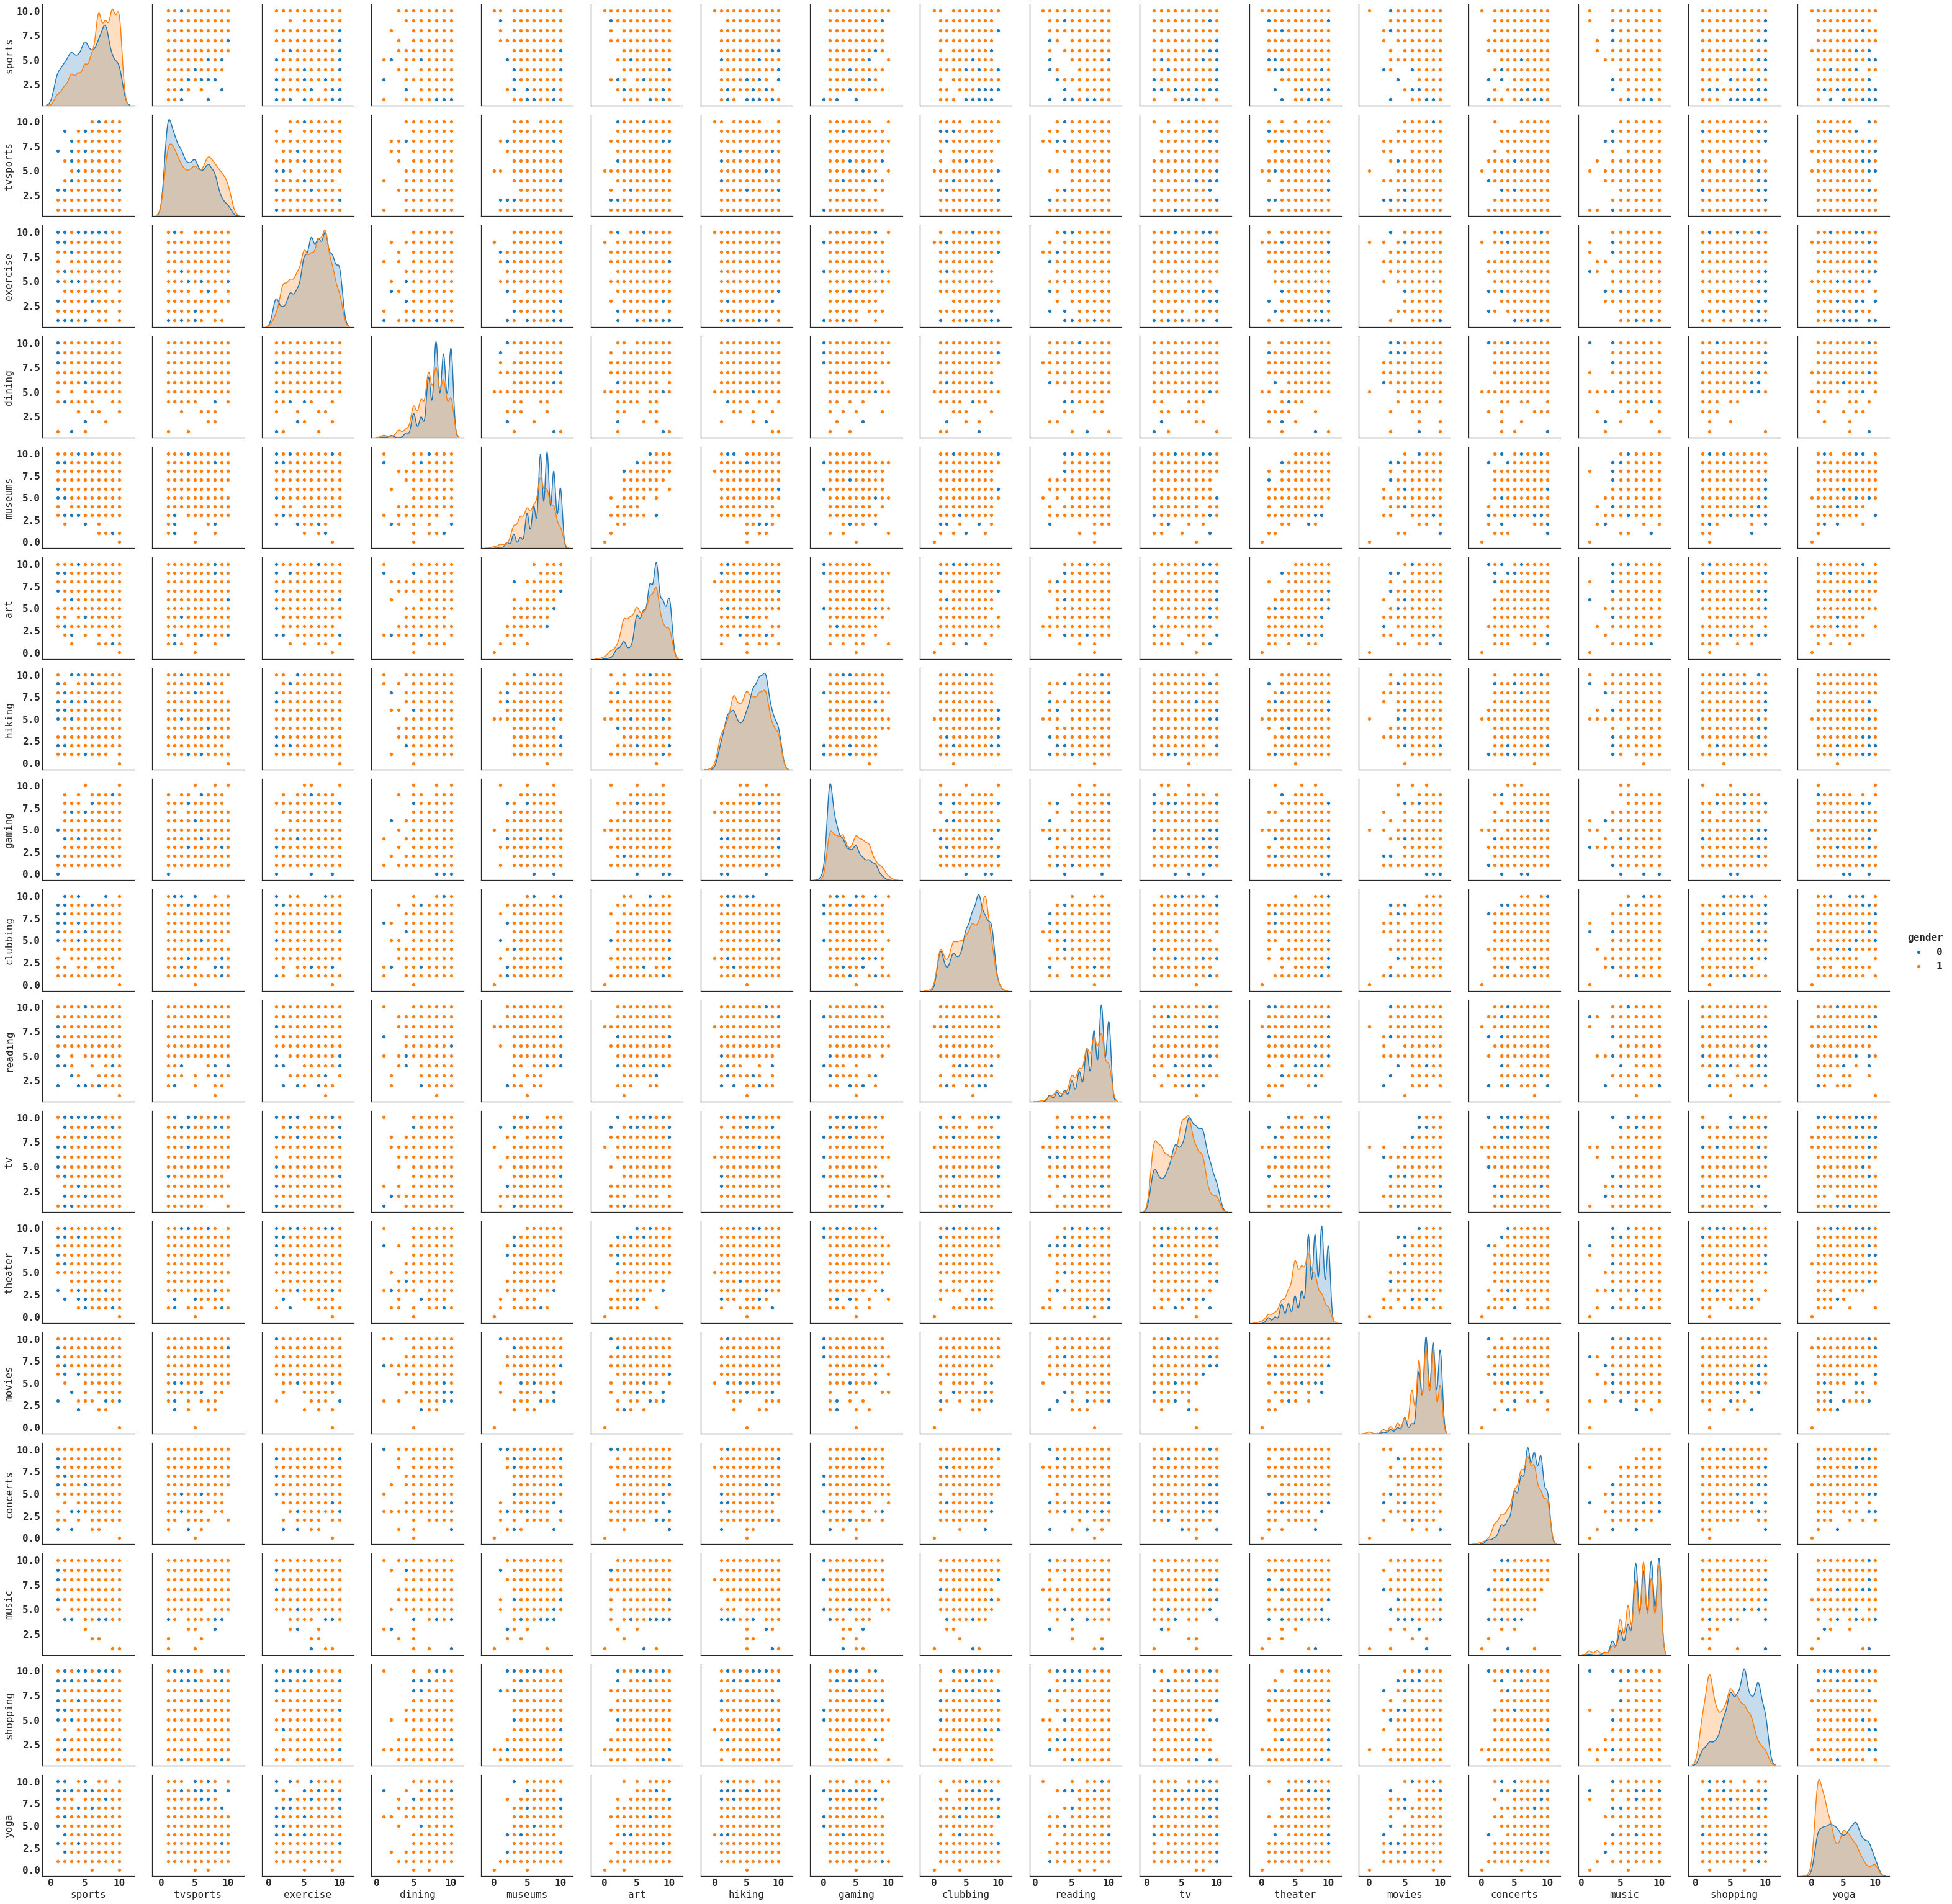

In [65]:
g = sns.pairplot(interests_clean, hue="gender")

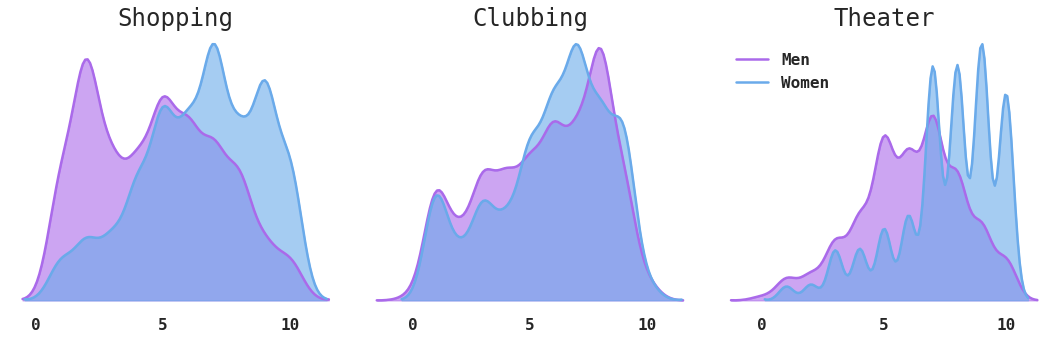

In [123]:
#plt.figure(figsize=(7,9))
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 16}
#rc('font', **font)


plt.style.use("seaborn-white")
plt.rc('font', **
       font)
plt.rc('axes', titlesize=24)
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].yaxis.set_visible(False)
axes[1].yaxis.set_visible(False)
axes[2].yaxis.set_visible(False)


g1 = sns.distplot(a=int_clean_men.shopping, hist=False, ax=axes[0], color="#AA6AEA",
                 kde_kws=dict(linewidth=2.5))
l1 = axes[0].lines[0]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
axes[0].fill_between(x1, y1, color="#AA6AEA", alpha=0.6)
g12 = sns.distplot(a=int_clean_women.shopping, hist=False,  ax=axes[0], color="#6AAAEA",
                  kde_kws=dict(linewidth=2.5))
l1 = axes[0].lines[1]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
axes[0].fill_between(x1, y1, color="#6AAAEA", alpha=0.6)

g2 = sns.distplot(a=int_clean_men.clubbing, hist=False, ax=axes[1], color="#AA6AEA",
                 kde_kws=dict(linewidth=2.5))
l1 = axes[1].lines[0]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
axes[1].fill_between(x1, y1, color="#AA6AEA", alpha=0.6)
g21 = sns.distplot(a=int_clean_women.clubbing, hist=False,  ax=axes[1], color="#6AAAEA",
                  kde_kws=dict(linewidth=2.5))
l1 = axes[1].lines[1]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
axes[1].fill_between(x1, y1, color="#6AAAEA", alpha=0.6)

g3 = sns.distplot(a=int_clean_men.theater, hist=False, ax=axes[2], color="#AA6AEA", 
                 label="Men", kde_kws=dict(linewidth=2.5))
l1 = axes[2].lines[0]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
axes[2].fill_between(x1, y1, color="#AA6AEA", alpha=0.6)
g31 = sns.distplot(a=int_clean_women.theater, hist=False,  ax=axes[2], color="#6AAAEA", 
                  label="Women", kde_kws=dict(linewidth=2.5))
l1 = axes[2].lines[1]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
axes[2].fill_between(x1, y1, color="#6AAAEA", alpha=0.6)

axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[2].set_xlabel("")

axes[0].set_title("Shopping")
axes[1].set_title("Clubbing")
axes[2].set_title("Theater")

for pos in ['right', 'top', 'bottom', 'left']:
    axes[0].spines[pos].set_visible(False)
    axes[1].spines[pos].set_visible(False)
    axes[2].spines[pos].set_visible(False)
    
axes[0].set_xticks([0, 5, 10])
axes[1].set_xticks([0, 5, 10])
axes[2].set_xticks([0, 5, 10])
    
plt.tight_layout()
plt.savefig("interest.png")
plt.show()


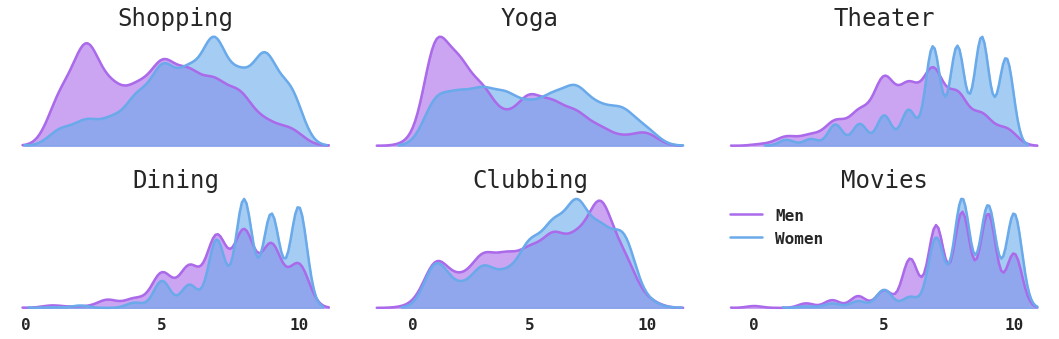

In [136]:
#plt.figure(figsize=(7,9))
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 16}
#rc('font', **font)


plt.style.use("seaborn-white")
plt.rc('font', **
       font)
plt.rc('axes', titlesize=24)
fig, axes = plt.subplots(2, 3, figsize=(15,5))

axes[0][0].yaxis.set_visible(False)
axes[0][1].yaxis.set_visible(False)
axes[0][2].yaxis.set_visible(False)

axes[1][0].yaxis.set_visible(False)
axes[1][1].yaxis.set_visible(False)
axes[1][2].yaxis.set_visible(False)

axes[0][0].xaxis.set_visible(False)
axes[0][1].xaxis.set_visible(False)
axes[0][2].xaxis.set_visible(False)

g1 = sns.distplot(a=int_clean_men.shopping, hist=False, ax=axes[0][0], color="#AA6AEA",
                 kde_kws=dict(linewidth=2.5))
l1 = axes[0][0].lines[0]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
axes[0][0].fill_between(x1, y1, color="#AA6AEA", alpha=0.6)
g12 = sns.distplot(a=int_clean_women.shopping, hist=False,  ax=axes[0][0], color="#6AAAEA",
                  kde_kws=dict(linewidth=2.5))
l1 = axes[0][0].lines[1]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
axes[0][0].fill_between(x1, y1, color="#6AAAEA", alpha=0.6)

g2 = sns.distplot(a=int_clean_men.yoga, hist=False, ax=axes[0][1], color="#AA6AEA",
                 kde_kws=dict(linewidth=2.5))
l1 = axes[0][1].lines[0]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
axes[0][1].fill_between(x1, y1, color="#AA6AEA", alpha=0.6)
g21 = sns.distplot(a=int_clean_women.yoga, hist=False,  ax=axes[0][1], color="#6AAAEA",
                  kde_kws=dict(linewidth=2.5))
l1 = axes[0][1].lines[1]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
axes[0][1].fill_between(x1, y1, color="#6AAAEA", alpha=0.6)

g3 = sns.distplot(a=int_clean_men.theater, hist=False, ax=axes[0][2], color="#AA6AEA", 
                  kde_kws=dict(linewidth=2.5))
l1 = axes[0][2].lines[0]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
axes[0][2].fill_between(x1, y1, color="#AA6AEA", alpha=0.6)
g31 = sns.distplot(a=int_clean_women.theater, hist=False,  ax=axes[0][2], color="#6AAAEA", 
                     kde_kws=dict(linewidth=2.5))
l1 = axes[0][2].lines[1]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
axes[0][2].fill_between(x1, y1, color="#6AAAEA", alpha=0.6)

g4 = sns.distplot(a=int_clean_men.dining, hist=False, ax=axes[1][0], color="#AA6AEA",
                 kde_kws=dict(linewidth=2.5))
l1 = axes[1][0].lines[0]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
axes[1][0].fill_between(x1, y1, color="#AA6AEA", alpha=0.6)
g42 = sns.distplot(a=int_clean_women.dining, hist=False,  ax=axes[1][0], color="#6AAAEA",
                  kde_kws=dict(linewidth=2.5))
l1 = axes[1][0].lines[1]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
axes[1][0].fill_between(x1, y1, color="#6AAAEA", alpha=0.6)

g5 = sns.distplot(a=int_clean_men.clubbing, hist=False, ax=axes[1][1], color="#AA6AEA",
                 kde_kws=dict(linewidth=2.5))
l1 = axes[1][1].lines[0]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
axes[1][1].fill_between(x1, y1, color="#AA6AEA", alpha=0.6)
g51 = sns.distplot(a=int_clean_women.clubbing, hist=False,  ax=axes[1][1], color="#6AAAEA",
                  kde_kws=dict(linewidth=2.5))
l1 = axes[1][1].lines[1]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
axes[1][1].fill_between(x1, y1, color="#6AAAEA", alpha=0.6)

g6 = sns.distplot(a=int_clean_men.movies, hist=False, ax=axes[1][2], color="#AA6AEA", 
                 label="Men", kde_kws=dict(linewidth=2.5))
l1 = axes[1][2].lines[0]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
axes[1][2].fill_between(x1, y1, color="#AA6AEA", alpha=0.6)
g61 = sns.distplot(a=int_clean_women.movies, hist=False,  ax=axes[1][2], color="#6AAAEA", 
                  label="Women", kde_kws=dict(linewidth=2.5))
l1 = axes[1][2].lines[1]
x1 = l1.get_xydata()[:, 0]
y1 = l1.get_xydata()[:, 1]
axes[1][2].fill_between(x1, y1, color="#6AAAEA", alpha=0.6)



# SETTINGS
axes[1][0].set_xlabel("")
axes[1][1].set_xlabel("")
axes[1][2].set_xlabel("")

axes[0][0].set_title("Shopping")
axes[0][1].set_title("Yoga")
axes[0][2].set_title("Theater")

axes[1][0].set_title("Dining")
axes[1][1].set_title("Clubbing")
axes[1][2].set_title("Movies")

for pos in ['right', 'top', 'bottom', 'left']:
    axes[0][0].spines[pos].set_visible(False)
    axes[0][1].spines[pos].set_visible(False)
    axes[0][2].spines[pos].set_visible(False)
    
    axes[1][0].spines[pos].set_visible(False)
    axes[1][1].spines[pos].set_visible(False)
    axes[1][2].spines[pos].set_visible(False)
    
axes[1][0].set_xticks([0, 5, 10])
axes[1][1].set_xticks([0, 5, 10])
axes[1][2].set_xticks([0, 5, 10])
    
plt.tight_layout()
plt.savefig("interest2.png")
plt.show()